tbd: termino independiente

# Least Squares Method:
## Polynomial Regression
First, lets aproach severla definitions coming from Linear Regression:
$
r_i = y_i -f(x_i, \beta)   \quad \rightarrow \quad   S = sum_{i=1}^n r_i^2 $   <br>
$ 
S(b) = \displaystyle\sum_{i=1}^n (y_i -x_i^Tb)^" = (y-Xb)^T(y-Xb)
$ <br><br>
A regression model is a linear one when the model comprises a linear combination of the parameters, i.e.,<br>
${\displaystyle f(x,{\boldsymbol {\beta }})=\sum _{j=1}^{m}\beta _{j}\phi _{j}(x),}$ <br>

Here is where we spare from the Linear Regression. We are trying now a polynomial approach:<br>
${\displaystyle \phi_{j}(x) = \sum _{k=1}^{r}a_rX_{ij}^r}$  
${\displaystyle f(x,{\boldsymbol {\beta }})=\sum _{k=1}^{r}\sum _{j=1}^{m}\beta _{jr}X_{ij}^r }$
<br>

### Matrix form and calculation of estimates

The polynomial regression model
${\displaystyle y_{i}\,=\,\beta _{0}+\beta _{1}x_{i}+\beta _{2}x_{i}^{2}+\cdots +\beta _{r}x_{i}^{r}+\varepsilon _{i}\ (i=1,2,\dots ,n)}$

can be expressed in matrix form in terms of a design matrix ${\displaystyle \mathbf {X} }$, a response vector ${\displaystyle {\vec {y}}}$, a parameter vector ${\displaystyle {\vec {\beta }}}$, and a vector ${\displaystyle {\vec {\varepsilon }}}$ of random errors.<br>
 The i-th row of ${\displaystyle \mathbf {X} }$ and ${\displaystyle {\vec {y}}}$ will contain the x and y value for the i-th data sample. Then the model can be written as a system of linear equations:
	
$\begin{bmatrix}y_{1}\cr y_{2}\cr y_{3}\cr ...\cr y_{n}\end{bmatrix}  ={\begin{bmatrix}1&x_{1}&x_{1}^{2}&... &x_{1}^{r}\cr1&x_{2}&x_{2}^{2}&... &x_{2}^{r}\cr1&x_{3}&x_{3}^{2}&... &x_{3}^{r}\cr...\cr1&x_{n}&x_{n}^{2}&\dots &x_{n}^{r}\end{bmatrix}}{\begin{bmatrix}\beta _{0}\\\beta _{1}\\\beta _{2}\\\vdots \\\beta _{r}\end{bmatrix}}+{\begin{bmatrix}\varepsilon _{1}\\\varepsilon _{2}\\\varepsilon _{3}\\\vdots \\\varepsilon _{n}\end{bmatrix}}$

which when using pure matrix notation is written as

   ${\displaystyle {\vec {y}}=\mathbf {X} {\vec {\beta }}+{\vec {\varepsilon }}.\,}$

The vector of estimated polynomial regression coefficients (using ordinary least squares estimation) is

   ${\displaystyle {\widehat {\vec {\beta }}}=(\mathbf {X} ^{\mathsf {T}}\mathbf {X} )^{-1}\;\mathbf {X} ^{\mathsf {T}}{\vec {y}},\,}$

assuming m < n which is required for the matrix to be invertible; then since ${\displaystyle \mathbf {X} }$ is a Vandermonde matrix, the invertibility condition is guaranteed to hold if all the ${\displaystyle x_{i}}$ values are distinct. This is the unique least-squares solution. 
<br><br><br><br>



In [2]:
%matplotlib widget
import matplotlib.pyplot as plt
from numpy.random import rand as rnd
import numpy as np


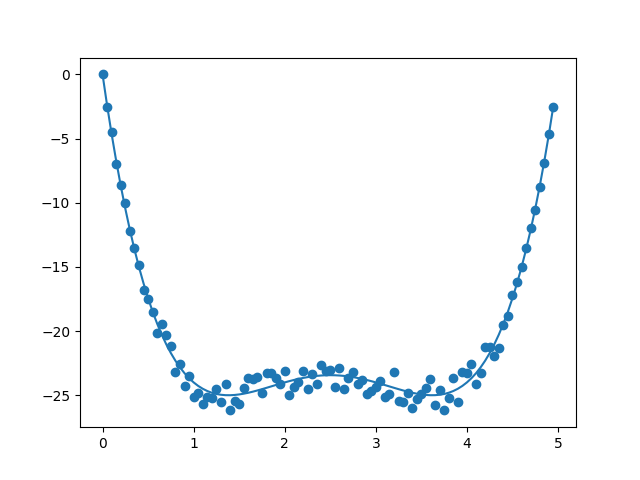

In [3]:
X =np.arange(0,5,.05).reshape(-1,1)#.transpose()# x "data": [-1, -0.96, ..., 0.96, 1]
Yid =X**4 - 10*X**3 + 35*X**2 - 50*X #  5e-10*X**6 - 1e-3*X**5 + 2e-3*X**4 - X**3 + X**2 - 2*X
Yre = np.matrix([y + (rnd()-.5)*y*.1 for y in Yid])

r = 8   #fitting grade curve

__,ax = plt.subplots()
ax.plot(X,Yid)
ax.scatter(list(X),list(Yre))
plt.show()

In [4]:
Xpoly = np.array([np.concatenate([x**i for x in X]  ) for i in range(0,r+1)]).transpose()

betha = np.linalg.inv(np.matmul(Xpoly.transpose(), Xpoly))
betha = np.matmul(betha,Xpoly.transpose())
betha = np.matmul(betha,Yre)

print(betha)

[[-3.10917762e-01]
 [-4.40219057e+01]
 [ 1.38712679e+01]
 [ 1.79953200e+01]
 [-1.70402526e+01]
 [ 6.25510905e+00]
 [-1.18805802e+00]
 [ 1.15672047e-01]
 [-4.46991869e-03]]


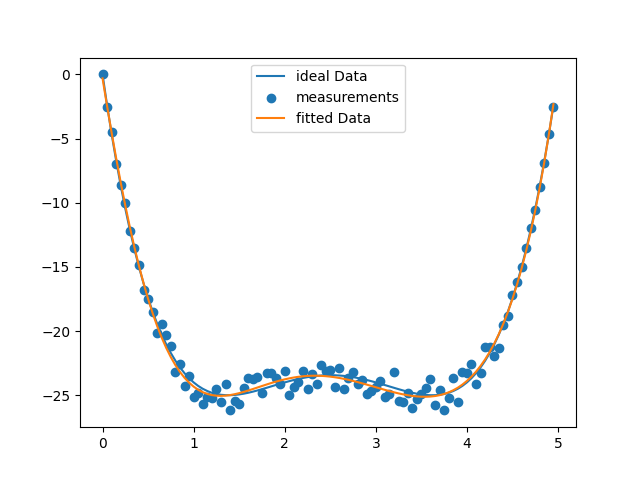

In [5]:
Yfit = np.matmul(Xpoly,betha)
__,ax = plt.subplots()
ax.plot(X,Yid, label='ideal Data')
ax.scatter(list(X),list(Yre), label= 'measurements')
ax.plot(X,Yfit, label = 'fitted Data')
ax.legend()
plt.show()
